In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [6]:
df = pd.read_csv("E:\\ML\\black.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [9]:
#find unique value
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Explorator Data Analysis

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

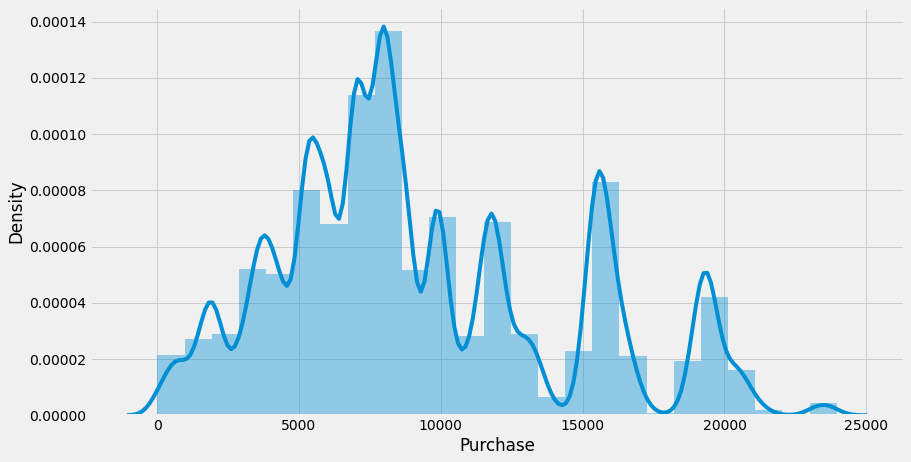

In [13]:
#displot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(df["Purchase"],bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

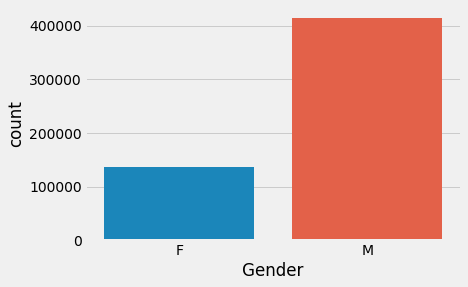

In [14]:
#distribution of numeric variables
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='Age', ylabel='count'>

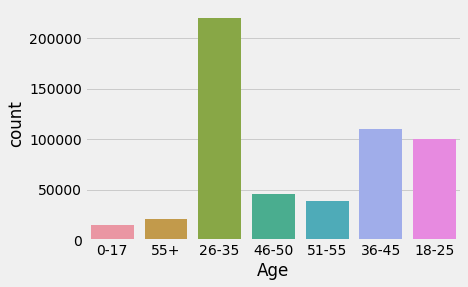

In [15]:
#distribution of numeric variables
sns.countplot(df["Age"])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

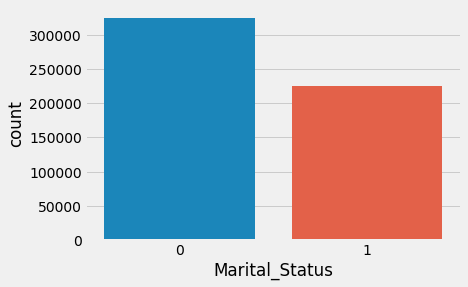

In [16]:
#distribution of numeric variables
sns.countplot(df["Marital_Status"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

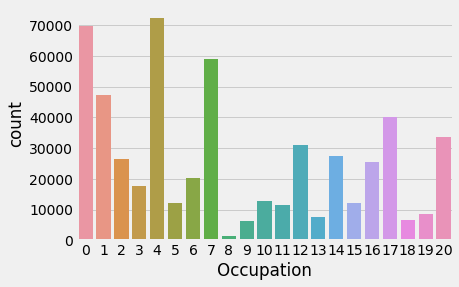

In [17]:
#distribution of numeric variables
sns.countplot(df["Occupation"])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

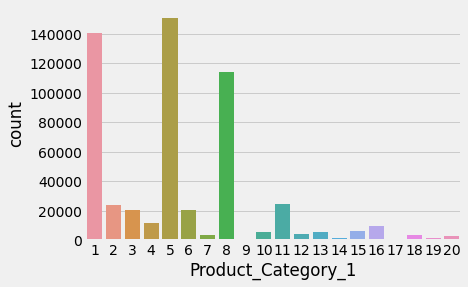

In [18]:
#distribution of numeric variables
sns.countplot(df["Product_Category_1"])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

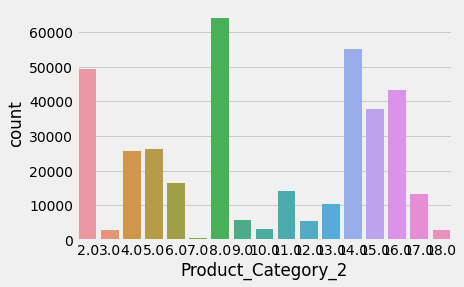

In [19]:
#distribution of numeric variables
sns.countplot(df["Product_Category_2"])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

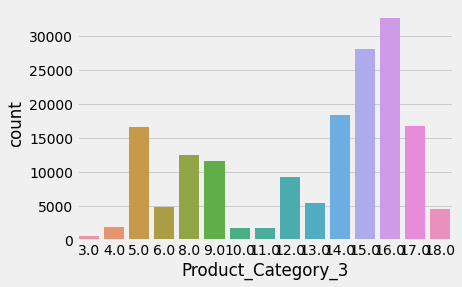

In [20]:
#distribution of numeric variables
sns.countplot(df["Product_Category_3"])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

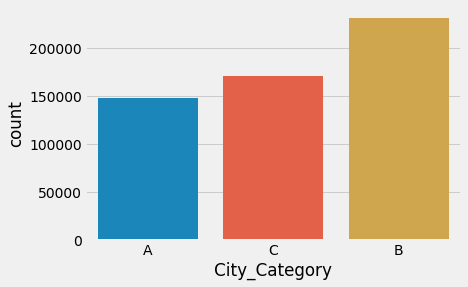

In [21]:
#distribution of numeric variables
sns.countplot(df["City_Category"])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

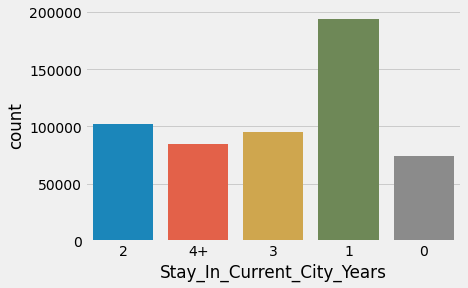

In [22]:
#distribution of numeric variables
sns.countplot(df["Stay_In_Current_City_Years"])

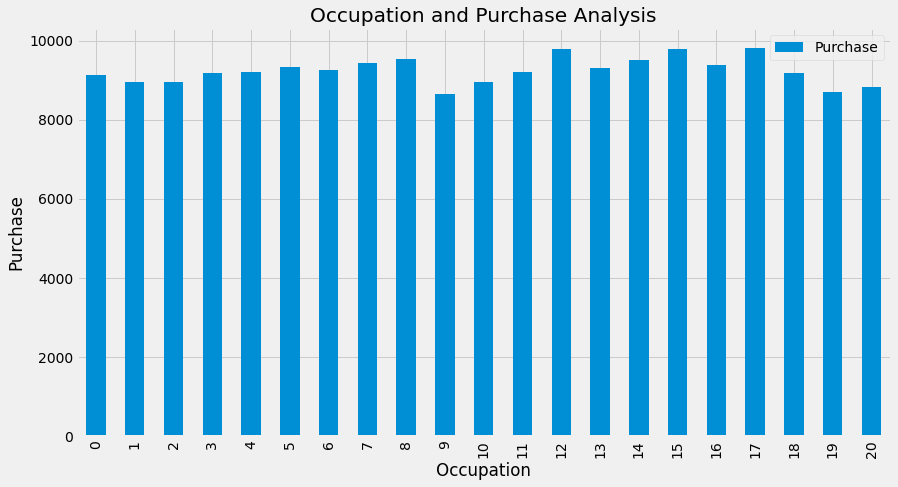

In [25]:
#bivariate analysis 
occpation_plot = df.pivot_table(index="Occupation", values="Purchase" , aggfunc=np.mean)
occpation_plot.plot(kind='bar',figsize = (13,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.show()

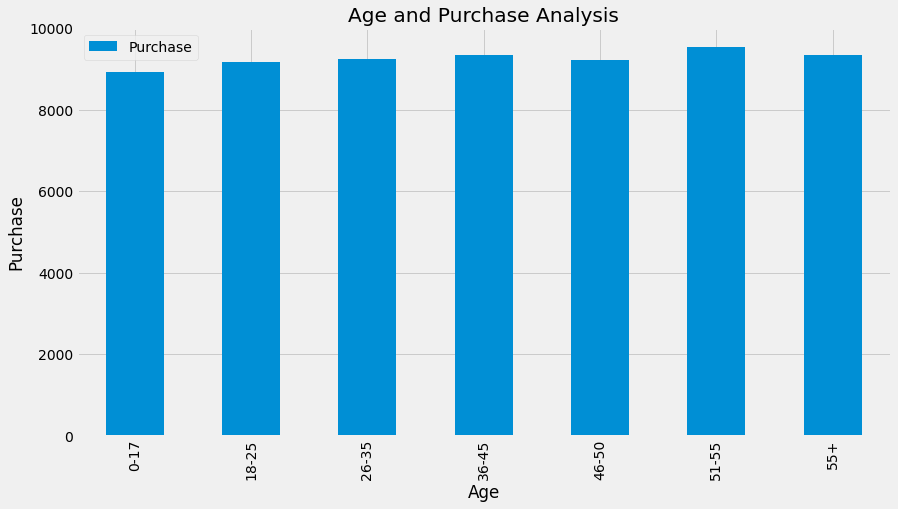

In [26]:
#bivariate analysis 
occpation_plot = df.pivot_table(index="Age", values="Purchase" , aggfunc=np.mean)
occpation_plot.plot(kind='bar',figsize = (13,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.show()

# Preprocessing the Dataset

In [29]:
#check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [30]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [31]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [32]:
#encoding value using dict
gender_dict = {'F':0,'M':1}
df['Gender'] = df['Gender'].apply(lambda x:gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [33]:
# Label encoding
cols = ['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


# Cooreation Matrix

<AxesSubplot:>

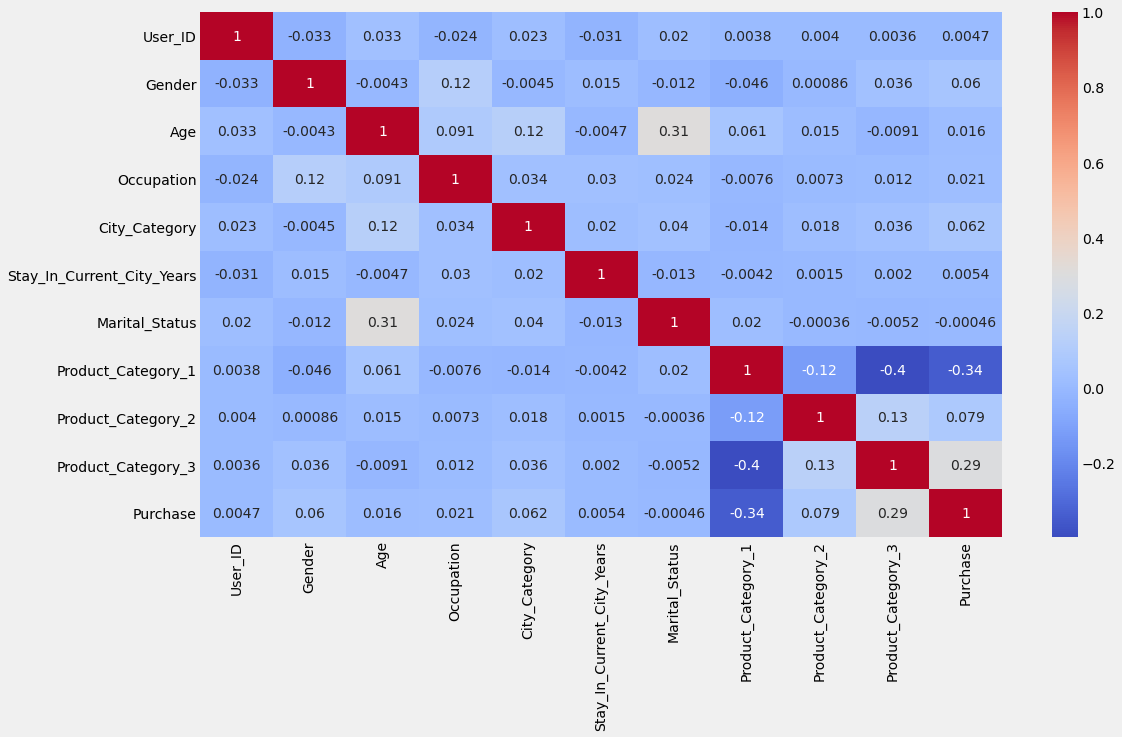

In [38]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True, cmap= 'coolwarm')

# Input split

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [42]:
X = df.drop(columns=['User_ID','Product_ID','Purchase'])
y = df["Purchase"]

# Model Training

In [44]:
from sklearn.model_selection import cross_val_predict , train_test_split
from sklearn.metrics import mean_squared_error
def train(model , X, y):
    X_train,X_test ,y_train , y_test = train_test_split(X,y ,random_state=42,test_size=0.25)
    model.fit(X_train,y_train)

    #Predict the result
    pred =model.predict(X_test)

    # Corss validation
    cv_score = cross_val_score(model,X,y,scoring = 'neg_mean_squared_error',cv = 5)
    cv_score = np.abs(np.mean(cv_score))
    print("Result")
    print("MSE:",mean_squared_error(y_test , pred))
    print("CV Scroe:", cv_score)